In [1]:
import os
import torch
import joblib
import matplotlib


from mpp.utils.data_processing import DataProcessor
from mpp.utils.model_utils import train_and_evaluate_models
from mpp.models.neural_network import NeuralNetworkModel
from mpp.models.random_forest import RandomForestModel
from mpp.models.gradient_boosting import GradientBoostingModel
from mpp.models.knn import BaselineKNN
from mpp.utils.visualization import plot_correlation_matrix, plot_results, plot_training_process, plot_multiple_training_processes, plot_feature_correlations
from mpp.tuning.tune import HyperparameterTuning

import warnings
warnings.filterwarnings('ignore')

# make figures appear inline
matplotlib.rcParams['figure.figsize'] = (15, 8)
%matplotlib inline

# notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
# use cuda if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cpu


In [3]:
def model_exists(model_path):
    return os.path.exists(model_path)

In [4]:
# Load the data
processor = DataProcessor("data/data.csv")
data = processor.load_data()
data_with_features = processor.extract_features()
print(data_with_features)

       pIC50  num_atoms     logP    MolWt  NumAtoms  NumBonds  NumC  NumO  \
0       4.26         25  4.15910  367.455        25        28     0     2   
1       4.34         36  3.67430  506.434        36        40     2     4   
2       4.53         23  1.53610  317.389        23        25    10     3   
3       4.56         22  0.95100  301.394        22        24     9     1   
4       4.59         21  3.21300  294.383        21        23     2     0   
...      ...        ...      ...      ...       ...       ...   ...   ...   
15032   0.00         24  3.21560  333.420        24        26     2     0   
15033   0.00         19  5.45270  275.461        19        19    11     0   
15034   0.00         17  4.67250  247.407        17        17     9     0   
15035   0.00         22  3.93289  306.394        22        25     1     0   
15036   0.02         13  1.70887  181.131        13        13     2     2   

       NumN  NumCl  NumF  NumBr  NumI  
0         1      0     0      0    

In [5]:
# Split the data
X_train, X_test, y_train_pic50, y_test_pic50, y_train_logP, y_test_logP = processor.split_data()

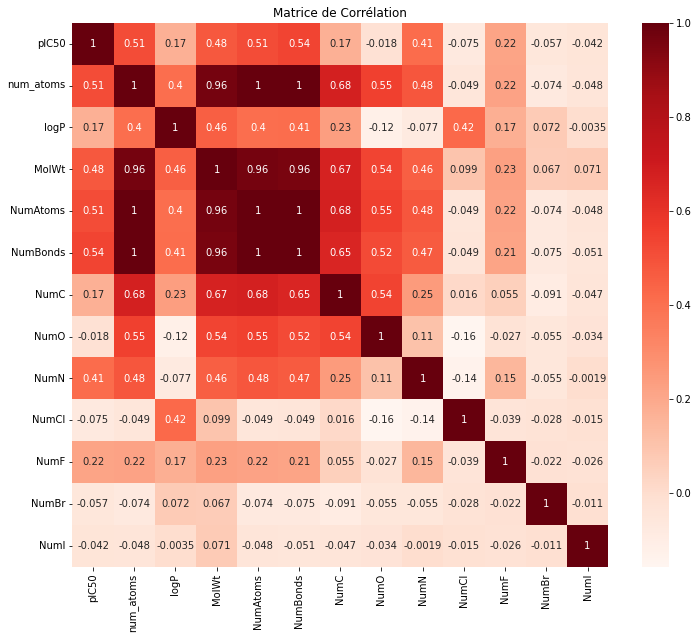

In [6]:
# Feature visualization
plot_correlation_matrix(data_with_features)

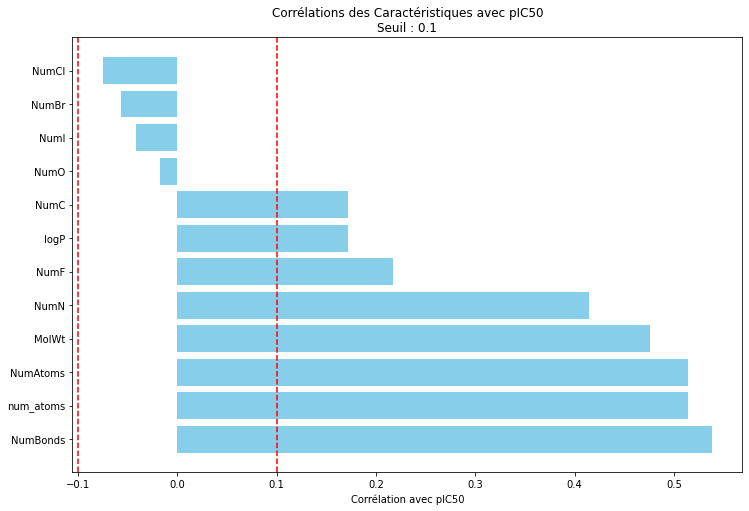

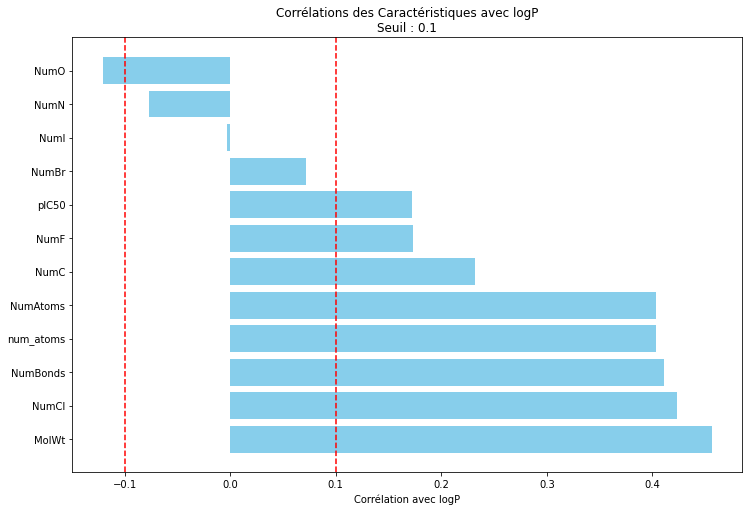

In [7]:
# Plot feature correlations with pIC50 and logP
plot_feature_correlations(data_with_features, 'pIC50', output_path="feature_correlations_pic50.png")
plot_feature_correlations(data_with_features, 'logP', output_path="feature_correlations_logP.png")

[I 2024-06-17 20:23:02,202] A new study created in memory with name: no-name-f417d55f-4d4a-4088-b023-53a532a30129


[I 2024-06-17 20:23:23,069] Trial 0 finished with value: 1.549441092154559 and parameters: {'lr': 0.009430283345000495, 'epochs': 42, 'batch_size': 146, 'hidden_layers': 1, 'hidden_size_0': 135, 'patience': 17}. Best is trial 0 with value: 1.549441092154559.


[I 2024-06-17 20:24:11,143] Trial 1 finished with value: 6.284937563809481 and parameters: {'lr': 0.058547202172004806, 'epochs': 50, 'batch_size': 44, 'hidden_layers': 3, 'hidden_size_0': 116, 'hidden_size_1': 159, 'hidden_size_2': 198, 'patience': 16}. Best is trial 0 with value: 1.549441092154559.


[I 2024-06-17 20:24:47,928] Trial 2 finished with value: 6.289442734284834 and parameters: {'lr': 0.09670083522470982, 'epochs': 49, 'batch_size': 111, 'hidden_layers': 2, 'hidden_size_0': 135, 'hidden_size_1': 99, 'patience': 18}. Best is trial 0 with value: 1.549441092154559.


[I 2024-06-17 20:25:15,865] Trial 3 finished with value: 1.2847151398658752 and parameters: {'lr': 0.005448114076416844, 'epochs': 22, 'batch_size': 70, 'hidden_layers': 3, 'hidden_size_0': 173, 'hidden_size_1': 100, 'hidden_size_2': 138, 'patience': 15}. Best is trial 3 with value: 1.2847151398658752.


[I 2024-06-17 20:26:02,147] Trial 4 finished with value: 1.4518047369188734 and parameters: {'lr': 0.03306436530965396, 'epochs': 27, 'batch_size': 54, 'hidden_layers': 2, 'hidden_size_0': 159, 'hidden_size_1': 197, 'patience': 7}. Best is trial 3 with value: 1.2847151398658752.


[I 2024-06-17 20:26:30,203] Trial 5 finished with value: 1.558841460943222 and parameters: {'lr': 0.01930836766265237, 'epochs': 44, 'batch_size': 126, 'hidden_layers': 2, 'hidden_size_0': 138, 'hidden_size_1': 98, 'patience': 14}. Best is trial 3 with value: 1.2847151398658752.


[I 2024-06-17 20:27:10,889] Trial 6 finished with value: 1.2840670847892761 and parameters: {'lr': 0.0008936388388328157, 'epochs': 67, 'batch_size': 98, 'hidden_layers': 2, 'hidden_size_0': 80, 'hidden_size_1': 97, 'patience': 8}. Best is trial 6 with value: 1.2840670847892761.


[I 2024-06-17 20:28:10,401] Trial 7 finished with value: 1.1160039279771887 and parameters: {'lr': 0.0003713956514891023, 'epochs': 79, 'batch_size': 105, 'hidden_layers': 3, 'hidden_size_0': 90, 'hidden_size_1': 88, 'hidden_size_2': 106, 'patience': 20}. Best is trial 7 with value: 1.1160039279771887.


[I 2024-06-17 20:28:57,537] Trial 8 finished with value: 1.9827199632471257 and parameters: {'lr': 0.0002506655978203903, 'epochs': 99, 'batch_size': 113, 'hidden_layers': 1, 'hidden_size_0': 164, 'patience': 8}. Best is trial 7 with value: 1.1160039279771887.


[I 2024-06-17 20:30:17,338] Trial 9 finished with value: 1.3269692380582132 and parameters: {'lr': 0.00020689482059641908, 'epochs': 85, 'batch_size': 78, 'hidden_layers': 2, 'hidden_size_0': 194, 'hidden_size_1': 159, 'patience': 17}. Best is trial 7 with value: 1.1160039279771887.


[I 2024-06-17 20:32:07,139] Trial 10 finished with value: 2.3368696018501565 and parameters: {'lr': 1.0108291324955433e-05, 'epochs': 72, 'batch_size': 30, 'hidden_layers': 3, 'hidden_size_0': 63, 'hidden_size_1': 53, 'hidden_size_2': 53, 'patience': 20}. Best is trial 7 with value: 1.1160039279771887.


[I 2024-06-17 20:32:55,561] Trial 11 finished with value: 1.145614627127846 and parameters: {'lr': 0.0009422142451804452, 'epochs': 70, 'batch_size': 102, 'hidden_layers': 3, 'hidden_size_0': 79, 'hidden_size_1': 59, 'hidden_size_2': 87, 'patience': 10}. Best is trial 7 with value: 1.1160039279771887.


[I 2024-06-17 20:33:48,749] Trial 12 finished with value: 1.759057485140287 and parameters: {'lr': 6.520753672147545e-05, 'epochs': 73, 'batch_size': 93, 'hidden_layers': 3, 'hidden_size_0': 94, 'hidden_size_1': 55, 'hidden_size_2': 89, 'patience': 11}. Best is trial 7 with value: 1.1160039279771887.


[I 2024-06-17 20:34:27,864] Trial 13 finished with value: 1.036678983271122 and parameters: {'lr': 0.0021666814143117574, 'epochs': 87, 'batch_size': 121, 'hidden_layers': 3, 'hidden_size_0': 54, 'hidden_size_1': 73, 'hidden_size_2': 115, 'patience': 11}. Best is trial 13 with value: 1.036678983271122.


[I 2024-06-17 20:34:43,123] Trial 14 finished with value: 1.4387936905810708 and parameters: {'lr': 0.0034617647731328698, 'epochs': 99, 'batch_size': 133, 'hidden_layers': 3, 'hidden_size_0': 53, 'hidden_size_1': 78, 'hidden_size_2': 133, 'patience': 5}. Best is trial 13 with value: 1.036678983271122.


[I 2024-06-17 20:35:27,868] Trial 15 finished with value: 1.0688873215725547 and parameters: {'lr': 0.0021244790203449886, 'epochs': 85, 'batch_size': 127, 'hidden_layers': 3, 'hidden_size_0': 104, 'hidden_size_1': 132, 'hidden_size_2': 109, 'patience': 13}. Best is trial 13 with value: 1.036678983271122.


[I 2024-06-17 20:36:02,194] Trial 16 finished with value: 1.278403441695606 and parameters: {'lr': 0.0025161198286360173, 'epochs': 87, 'batch_size': 149, 'hidden_layers': 3, 'hidden_size_0': 110, 'hidden_size_1': 133, 'hidden_size_2': 168, 'patience': 13}. Best is trial 13 with value: 1.036678983271122.


[I 2024-06-17 20:36:22,213] Trial 17 finished with value: 1.764991211263757 and parameters: {'lr': 0.0018263927185594787, 'epochs': 61, 'batch_size': 128, 'hidden_layers': 1, 'hidden_size_0': 66, 'patience': 11}. Best is trial 13 with value: 1.036678983271122.


[I 2024-06-17 20:37:27,717] Trial 18 finished with value: 1.520107501745224 and parameters: {'lr': 7.28403206919533e-05, 'epochs': 90, 'batch_size': 122, 'hidden_layers': 3, 'hidden_size_0': 105, 'hidden_size_1': 136, 'hidden_size_2': 107, 'patience': 12}. Best is trial 13 with value: 1.036678983271122.


[I 2024-06-17 20:38:07,072] Trial 19 finished with value: 1.3492488692204156 and parameters: {'lr': 0.010110826078796513, 'epochs': 59, 'batch_size': 82, 'hidden_layers': 2, 'hidden_size_0': 51, 'hidden_size_1': 121, 'patience': 9}. Best is trial 13 with value: 1.036678983271122.


[I 2024-06-17 20:38:30,041] Trial 20 finished with value: 1.2825174000528123 and parameters: {'lr': 0.0006032282277458818, 'epochs': 34, 'batch_size': 137, 'hidden_layers': 3, 'hidden_size_0': 73, 'hidden_size_1': 119, 'hidden_size_2': 154, 'patience': 13}. Best is trial 13 with value: 1.036678983271122.


[I 2024-06-17 20:38:54,234] Trial 21 finished with value: 1.4592702117833225 and parameters: {'lr': 0.0003726832624619514, 'epochs': 79, 'batch_size': 113, 'hidden_layers': 3, 'hidden_size_0': 99, 'hidden_size_1': 71, 'hidden_size_2': 102, 'patience': 5}. Best is trial 13 with value: 1.036678983271122.


[I 2024-06-17 20:39:03,065] Trial 22 finished with value: 1.533005380112192 and parameters: {'lr': 0.0018232447637876522, 'epochs': 12, 'batch_size': 107, 'hidden_layers': 3, 'hidden_size_0': 88, 'hidden_size_1': 73, 'hidden_size_2': 114, 'patience': 20}. Best is trial 13 with value: 1.036678983271122.


[I 2024-06-17 20:40:01,951] Trial 23 finished with value: 1.413573321700096 and parameters: {'lr': 0.00010889339482777508, 'epochs': 80, 'batch_size': 122, 'hidden_layers': 3, 'hidden_size_0': 119, 'hidden_size_1': 154, 'hidden_size_2': 67, 'patience': 19}. Best is trial 13 with value: 1.036678983271122.


[I 2024-06-17 20:40:51,474] Trial 24 finished with value: 2.447018457783593 and parameters: {'lr': 1.863955382745128e-05, 'epochs': 96, 'batch_size': 140, 'hidden_layers': 2, 'hidden_size_0': 92, 'hidden_size_1': 82, 'patience': 15}. Best is trial 13 with value: 1.036678983271122.


[I 2024-06-17 20:41:56,518] Trial 25 finished with value: 1.138428543295179 and parameters: {'lr': 0.0005564831530951995, 'epochs': 91, 'batch_size': 118, 'hidden_layers': 3, 'hidden_size_0': 65, 'hidden_size_1': 108, 'hidden_size_2': 124, 'patience': 11}. Best is trial 13 with value: 1.036678983271122.


[I 2024-06-17 20:42:44,790] Trial 26 finished with value: 1.1716578591752935 and parameters: {'lr': 0.006006055757019447, 'epochs': 78, 'batch_size': 92, 'hidden_layers': 3, 'hidden_size_0': 127, 'hidden_size_1': 179, 'hidden_size_2': 93, 'patience': 14}. Best is trial 13 with value: 1.036678983271122.


[I 2024-06-17 20:43:17,121] Trial 27 finished with value: 1.1844205806652706 and parameters: {'lr': 0.0014924526281625196, 'epochs': 82, 'batch_size': 103, 'hidden_layers': 2, 'hidden_size_0': 83, 'hidden_size_1': 87, 'patience': 7}. Best is trial 13 with value: 1.036678983271122.


[I 2024-06-17 20:43:54,577] Trial 28 finished with value: 1.138564104406998 and parameters: {'lr': 0.0033867758037465128, 'epochs': 65, 'batch_size': 83, 'hidden_layers': 3, 'hidden_size_0': 71, 'hidden_size_1': 144, 'hidden_size_2': 75, 'patience': 12}. Best is trial 13 with value: 1.036678983271122.


[I 2024-06-17 20:45:00,258] Trial 29 finished with value: 1.3658805787563324 and parameters: {'lr': 0.015714783038043016, 'epochs': 92, 'batch_size': 132, 'hidden_layers': 3, 'hidden_size_0': 146, 'hidden_size_1': 115, 'hidden_size_2': 120, 'patience': 17}. Best is trial 13 with value: 1.036678983271122.


[I 2024-06-17 20:45:22,694] Trial 30 finished with value: 2.32002159427194 and parameters: {'lr': 0.0001554329913404308, 'epochs': 77, 'batch_size': 146, 'hidden_layers': 1, 'hidden_size_0': 104, 'patience': 10}. Best is trial 13 with value: 1.036678983271122.


[I 2024-06-17 20:46:21,964] Trial 31 finished with value: 1.1508812875974745 and parameters: {'lr': 0.00042368911462445526, 'epochs': 92, 'batch_size': 119, 'hidden_layers': 3, 'hidden_size_0': 60, 'hidden_size_1': 114, 'hidden_size_2': 128, 'patience': 11}. Best is trial 13 with value: 1.036678983271122.


[I 2024-06-17 20:47:13,760] Trial 32 finished with value: 1.1290998402095975 and parameters: {'lr': 0.000686323747575308, 'epochs': 89, 'batch_size': 118, 'hidden_layers': 3, 'hidden_size_0': 58, 'hidden_size_1': 65, 'hidden_size_2': 147, 'patience': 10}. Best is trial 13 with value: 1.036678983271122.


[I 2024-06-17 20:47:47,547] Trial 33 finished with value: 1.2045790867673025 and parameters: {'lr': 0.0010431549190369944, 'epochs': 85, 'batch_size': 140, 'hidden_layers': 3, 'hidden_size_0': 50, 'hidden_size_1': 65, 'hidden_size_2': 150, 'patience': 9}. Best is trial 13 with value: 1.036678983271122.


[I 2024-06-17 20:48:18,658] Trial 34 finished with value: 1.5200564044973124 and parameters: {'lr': 0.005823677681256658, 'epochs': 75, 'batch_size': 109, 'hidden_layers': 3, 'hidden_size_0': 76, 'hidden_size_1': 88, 'hidden_size_2': 147, 'patience': 16}. Best is trial 13 with value: 1.036678983271122.


[I 2024-06-17 20:49:09,287] Trial 35 finished with value: 1.4448896809057756 and parameters: {'lr': 0.0002680492338593904, 'epochs': 85, 'batch_size': 114, 'hidden_layers': 3, 'hidden_size_0': 59, 'hidden_size_1': 65, 'hidden_size_2': 104, 'patience': 18}. Best is trial 13 with value: 1.036678983271122.


[I 2024-06-17 20:50:03,042] Trial 36 finished with value: 1.1318313255906105 and parameters: {'lr': 0.0007229555459428534, 'epochs': 55, 'batch_size': 67, 'hidden_layers': 3, 'hidden_size_0': 115, 'hidden_size_1': 88, 'hidden_size_2': 170, 'patience': 14}. Best is trial 13 with value: 1.036678983271122.


[I 2024-06-17 20:50:53,122] Trial 37 finished with value: 1.1736798160954525 and parameters: {'lr': 0.0013074720887642553, 'epochs': 97, 'batch_size': 127, 'hidden_layers': 2, 'hidden_size_0': 87, 'hidden_size_1': 129, 'patience': 10}. Best is trial 13 with value: 1.036678983271122.


[I 2024-06-17 20:51:22,193] Trial 38 finished with value: 1.2146997690200805 and parameters: {'lr': 0.002841521135812079, 'epochs': 47, 'batch_size': 98, 'hidden_layers': 2, 'hidden_size_0': 129, 'hidden_size_1': 107, 'patience': 7}. Best is trial 13 with value: 1.036678983271122.


[I 2024-06-17 20:52:20,983] Trial 39 finished with value: 1.7361472435295582 and parameters: {'lr': 0.04486314583041308, 'epochs': 66, 'batch_size': 103, 'hidden_layers': 3, 'hidden_size_0': 97, 'hidden_size_1': 147, 'hidden_size_2': 111, 'patience': 15}. Best is trial 13 with value: 1.036678983271122.


[I 2024-06-17 20:52:44,988] Trial 40 finished with value: 1.11678493590582 and parameters: {'lr': 0.009077387188150205, 'epochs': 94, 'batch_size': 117, 'hidden_layers': 2, 'hidden_size_0': 72, 'hidden_size_1': 173, 'patience': 8}. Best is trial 13 with value: 1.036678983271122.


[I 2024-06-17 20:53:08,951] Trial 41 finished with value: 1.2630960572333563 and parameters: {'lr': 0.010532328252177044, 'epochs': 89, 'batch_size': 117, 'hidden_layers': 2, 'hidden_size_0': 70, 'hidden_size_1': 173, 'patience': 8}. Best is trial 13 with value: 1.036678983271122.


[I 2024-06-17 20:53:23,696] Trial 42 finished with value: 1.5467062771320343 and parameters: {'lr': 0.022986027925824132, 'epochs': 94, 'batch_size': 125, 'hidden_layers': 2, 'hidden_size_0': 56, 'hidden_size_1': 199, 'patience': 6}. Best is trial 13 with value: 1.036678983271122.


[I 2024-06-17 20:53:30,760] Trial 43 finished with value: 6.274717673011448 and parameters: {'lr': 0.07369889293799102, 'epochs': 84, 'batch_size': 107, 'hidden_layers': 2, 'hidden_size_0': 83, 'hidden_size_1': 180, 'patience': 9}. Best is trial 13 with value: 1.036678983271122.


[I 2024-06-17 20:54:04,373] Trial 44 finished with value: 1.5392835673532987 and parameters: {'lr': 0.0044954755797926025, 'epochs': 95, 'batch_size': 132, 'hidden_layers': 1, 'hidden_size_0': 76, 'patience': 8}. Best is trial 13 with value: 1.036678983271122.


[I 2024-06-17 20:55:04,417] Trial 45 finished with value: 1.340971782207489 and parameters: {'lr': 0.0003483524540294186, 'epochs': 99, 'batch_size': 98, 'hidden_layers': 2, 'hidden_size_0': 67, 'hidden_size_1': 169, 'patience': 10}. Best is trial 13 with value: 1.036678983271122.


[I 2024-06-17 20:55:38,991] Trial 46 finished with value: 1.126595251262188 and parameters: {'lr': 0.007711401604003261, 'epochs': 88, 'batch_size': 111, 'hidden_layers': 3, 'hidden_size_0': 184, 'hidden_size_1': 50, 'hidden_size_2': 94, 'patience': 12}. Best is trial 13 with value: 1.036678983271122.


[I 2024-06-17 20:56:05,913] Trial 47 finished with value: 1.200400561094284 and parameters: {'lr': 0.007290313287741596, 'epochs': 70, 'batch_size': 111, 'hidden_layers': 2, 'hidden_size_0': 192, 'hidden_size_1': 52, 'patience': 12}. Best is trial 13 with value: 1.036678983271122.


[I 2024-06-17 20:56:41,101] Trial 48 finished with value: 1.267281983907406 and parameters: {'lr': 0.018548944227900217, 'epochs': 82, 'batch_size': 95, 'hidden_layers': 3, 'hidden_size_0': 180, 'hidden_size_1': 93, 'hidden_size_2': 79, 'patience': 13}. Best is trial 13 with value: 1.036678983271122.


[I 2024-06-17 20:57:21,415] Trial 49 finished with value: 2.139677074338709 and parameters: {'lr': 0.02871933328262385, 'epochs': 100, 'batch_size': 89, 'hidden_layers': 3, 'hidden_size_0': 140, 'hidden_size_1': 75, 'hidden_size_2': 99, 'patience': 16}. Best is trial 13 with value: 1.036678983271122.




Best trial for Neural Network: {'lr': 0.0021666814143117574, 'epochs': 87, 'batch_size': 121, 'hidden_layers': 3, 'hidden_size_0': 54, 'hidden_size_1': 73, 'hidden_size_2': 115, 'patience': 11}



Neural Network Model MSE for pIC50: 0.8760752519263502


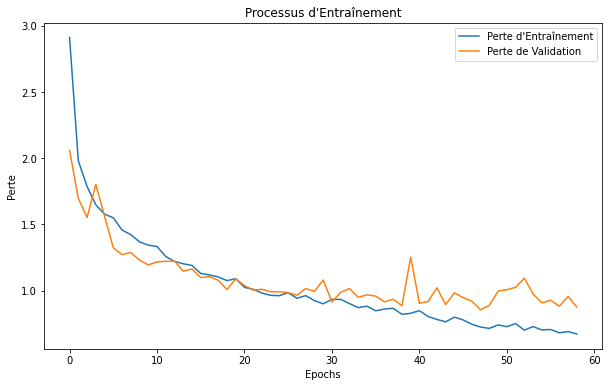

In [8]:
# Hyperparameter tuning for Neural Network (pIC50)
if model_exists('params/nn_best_params_pic50.pkl'):
    print("Loaded existing pIC50 params.\n")
    loaded_best_params_pic50 = joblib.load('params/nn_best_params_pic50.pkl')
    print(f"Best trial : {loaded_best_params_pic50}")
    nn_model_pic50 = NeuralNetworkModel(
        input_size=X_train.shape[1],
        hidden_sizes=[loaded_best_params_pic50[f"hidden_size_{i}"] for i in range(loaded_best_params_pic50["hidden_layers"])],
        lr=loaded_best_params_pic50["lr"],
        epochs=loaded_best_params_pic50["epochs"],
        batch_size=loaded_best_params_pic50["batch_size"],
        patience=loaded_best_params_pic50["patience"]
    )
    training_loss_pic50, validation_loss_pic50 = nn_model_pic50.train(X_train, y_train_pic50, X_test, y_test_pic50)
    print(f"Neural Network Model MSE for pIC50: {nn_model_pic50.evaluate(X_test, y_test_pic50)}")
    plot_training_process(training_loss_pic50, validation_loss_pic50, output_path="training_process_pic50.png")
else:
    tuner_pic50 = HyperparameterTuning(X_train, y_train_pic50, "Neural Network")
    best_params_pic50 = tuner_pic50.tune(n_trials=50)
    joblib.dump(best_params_pic50, 'params/nn_best_params_pic50.pkl')
    nn_model_pic50 = NeuralNetworkModel(
        input_size=X_train.shape[1],
        hidden_sizes=[best_params_pic50[f"hidden_size_{i}"] for i in range(best_params_pic50["hidden_layers"])],
        lr=best_params_pic50["lr"],
        epochs=best_params_pic50["epochs"],
        batch_size=best_params_pic50["batch_size"],
        patience=best_params_pic50["patience"]
    )
    training_loss_pic50, validation_loss_pic50 = nn_model_pic50.train(X_train, y_train_pic50, X_test, y_test_pic50)
    print(f"Neural Network Model MSE for pIC50: {nn_model_pic50.evaluate(X_test, y_test_pic50)}")
    plot_training_process(training_loss_pic50, validation_loss_pic50, output_path="training_process_pic50.png")


[I 2024-06-17 20:58:24,456] A new study created in memory with name: no-name-5fd807b4-1917-4296-baec-a50e8b7b1718


[I 2024-06-17 20:58:39,621] Trial 0 finished with value: 0.5229134191572666 and parameters: {'lr': 0.001522891823363104, 'epochs': 27, 'batch_size': 100, 'hidden_layers': 2, 'hidden_size_0': 87, 'hidden_size_1': 56, 'patience': 7}. Best is trial 0 with value: 0.5229134191572666.


[I 2024-06-17 20:59:04,841] Trial 1 finished with value: 0.667897917128898 and parameters: {'lr': 4.616827680348377e-05, 'epochs': 33, 'batch_size': 66, 'hidden_layers': 2, 'hidden_size_0': 192, 'hidden_size_1': 66, 'patience': 11}. Best is trial 0 with value: 0.5229134191572666.


[I 2024-06-17 20:59:33,645] Trial 2 finished with value: 0.5750072648127874 and parameters: {'lr': 0.03031987308458667, 'epochs': 42, 'batch_size': 58, 'hidden_layers': 2, 'hidden_size_0': 149, 'hidden_size_1': 174, 'patience': 7}. Best is trial 0 with value: 0.5229134191572666.


[I 2024-06-17 20:59:39,078] Trial 3 finished with value: 0.6551171437553738 and parameters: {'lr': 0.02049575352782572, 'epochs': 33, 'batch_size': 108, 'hidden_layers': 1, 'hidden_size_0': 51, 'patience': 6}. Best is trial 0 with value: 0.5229134191572666.


[I 2024-06-17 21:00:24,630] Trial 4 finished with value: 0.47364576905965805 and parameters: {'lr': 0.013860119931191713, 'epochs': 95, 'batch_size': 126, 'hidden_layers': 2, 'hidden_size_0': 171, 'hidden_size_1': 112, 'patience': 13}. Best is trial 4 with value: 0.47364576905965805.


[I 2024-06-17 21:01:54,183] Trial 5 finished with value: 0.5544214313849807 and parameters: {'lr': 0.024689254707767675, 'epochs': 68, 'batch_size': 76, 'hidden_layers': 3, 'hidden_size_0': 146, 'hidden_size_1': 135, 'hidden_size_2': 188, 'patience': 11}. Best is trial 4 with value: 0.47364576905965805.


[I 2024-06-17 21:02:25,699] Trial 6 finished with value: 0.8825280467669169 and parameters: {'lr': 2.4757532487724016e-05, 'epochs': 99, 'batch_size': 138, 'hidden_layers': 1, 'hidden_size_0': 109, 'patience': 18}. Best is trial 4 with value: 0.47364576905965805.


[I 2024-06-17 21:02:45,448] Trial 7 finished with value: 0.7147426009178162 and parameters: {'lr': 2.9279355597189558e-05, 'epochs': 35, 'batch_size': 149, 'hidden_layers': 3, 'hidden_size_0': 124, 'hidden_size_1': 149, 'hidden_size_2': 64, 'patience': 6}. Best is trial 4 with value: 0.47364576905965805.


[I 2024-06-17 21:03:17,629] Trial 8 finished with value: 0.4486647268821453 and parameters: {'lr': 0.0035962196079339275, 'epochs': 37, 'batch_size': 85, 'hidden_layers': 3, 'hidden_size_0': 146, 'hidden_size_1': 134, 'hidden_size_2': 52, 'patience': 6}. Best is trial 8 with value: 0.4486647268821453.


[I 2024-06-17 21:04:07,416] Trial 9 finished with value: 0.45871771451754445 and parameters: {'lr': 0.002607003374112187, 'epochs': 53, 'batch_size': 62, 'hidden_layers': 2, 'hidden_size_0': 131, 'hidden_size_1': 132, 'patience': 12}. Best is trial 8 with value: 0.4486647268821453.


[I 2024-06-17 21:04:26,331] Trial 10 finished with value: 0.5827365646040753 and parameters: {'lr': 0.00019148795130921197, 'epochs': 11, 'batch_size': 32, 'hidden_layers': 3, 'hidden_size_0': 196, 'hidden_size_1': 195, 'hidden_size_2': 55, 'patience': 20}. Best is trial 8 with value: 0.4486647268821453.


[I 2024-06-17 21:05:51,225] Trial 11 finished with value: 0.4098799576361974 and parameters: {'lr': 0.001899077798057103, 'epochs': 62, 'batch_size': 45, 'hidden_layers': 3, 'hidden_size_0': 147, 'hidden_size_1': 105, 'hidden_size_2': 114, 'patience': 14}. Best is trial 11 with value: 0.4098799576361974.


[I 2024-06-17 21:07:38,312] Trial 12 finished with value: 0.4554779718459492 and parameters: {'lr': 0.0003813427938038298, 'epochs': 68, 'batch_size': 34, 'hidden_layers': 3, 'hidden_size_0': 168, 'hidden_size_1': 97, 'hidden_size_2': 133, 'patience': 15}. Best is trial 11 with value: 0.4098799576361974.


[I 2024-06-17 21:08:36,133] Trial 13 finished with value: 0.44976365360720405 and parameters: {'lr': 0.0048077760510052145, 'epochs': 67, 'batch_size': 84, 'hidden_layers': 3, 'hidden_size_0': 99, 'hidden_size_1': 93, 'hidden_size_2': 110, 'patience': 15}. Best is trial 11 with value: 0.4098799576361974.


[I 2024-06-17 21:10:07,849] Trial 14 finished with value: 0.44533825745540007 and parameters: {'lr': 0.0004851527353773406, 'epochs': 82, 'batch_size': 43, 'hidden_layers': 3, 'hidden_size_0': 157, 'hidden_size_1': 159, 'hidden_size_2': 105, 'patience': 9}. Best is trial 11 with value: 0.4098799576361974.


[I 2024-06-17 21:11:36,908] Trial 15 finished with value: 0.46336108108736435 and parameters: {'lr': 0.0004310506442920874, 'epochs': 84, 'batch_size': 46, 'hidden_layers': 3, 'hidden_size_0': 165, 'hidden_size_1': 163, 'hidden_size_2': 113, 'patience': 9}. Best is trial 11 with value: 0.4098799576361974.


[I 2024-06-17 21:13:13,843] Trial 16 finished with value: 0.478921070987103 and parameters: {'lr': 0.00014740676234086396, 'epochs': 81, 'batch_size': 48, 'hidden_layers': 3, 'hidden_size_0': 177, 'hidden_size_1': 82, 'hidden_size_2': 143, 'patience': 9}. Best is trial 11 with value: 0.4098799576361974.


[I 2024-06-17 21:13:39,500] Trial 17 finished with value: 0.5381774598589311 and parameters: {'lr': 0.0009342859433465373, 'epochs': 53, 'batch_size': 47, 'hidden_layers': 1, 'hidden_size_0': 127, 'patience': 15}. Best is trial 11 with value: 0.4098799576361974.


[I 2024-06-17 21:15:30,414] Trial 18 finished with value: 0.6868693930683313 and parameters: {'lr': 1.0233164875442799e-05, 'epochs': 81, 'batch_size': 30, 'hidden_layers': 2, 'hidden_size_0': 67, 'hidden_size_1': 115, 'patience': 17}. Best is trial 11 with value: 0.4098799576361974.


[I 2024-06-17 21:15:46,625] Trial 19 finished with value: 2.0646983560393837 and parameters: {'lr': 0.07011895673065924, 'epochs': 62, 'batch_size': 72, 'hidden_layers': 3, 'hidden_size_0': 153, 'hidden_size_1': 199, 'hidden_size_2': 96, 'patience': 9}. Best is trial 11 with value: 0.4098799576361974.


[I 2024-06-17 21:16:56,266] Trial 20 finished with value: 0.4188506081700325 and parameters: {'lr': 0.007778282176811682, 'epochs': 87, 'batch_size': 102, 'hidden_layers': 3, 'hidden_size_0': 113, 'hidden_size_1': 174, 'hidden_size_2': 84, 'patience': 13}. Best is trial 11 with value: 0.4098799576361974.


[I 2024-06-17 21:18:11,263] Trial 21 finished with value: 0.4134019882906051 and parameters: {'lr': 0.008221942063229374, 'epochs': 89, 'batch_size': 115, 'hidden_layers': 3, 'hidden_size_0': 118, 'hidden_size_1': 175, 'hidden_size_2': 83, 'patience': 13}. Best is trial 11 with value: 0.4098799576361974.


[I 2024-06-17 21:19:23,887] Trial 22 finished with value: 0.3868135173212398 and parameters: {'lr': 0.007400338401672379, 'epochs': 91, 'batch_size': 114, 'hidden_layers': 3, 'hidden_size_0': 114, 'hidden_size_1': 179, 'hidden_size_2': 82, 'patience': 13}. Best is trial 22 with value: 0.3868135173212398.


[I 2024-06-17 21:20:38,322] Trial 23 finished with value: 0.3862021771215257 and parameters: {'lr': 0.009273100382438861, 'epochs': 91, 'batch_size': 120, 'hidden_layers': 3, 'hidden_size_0': 90, 'hidden_size_1': 183, 'hidden_size_2': 79, 'patience': 14}. Best is trial 23 with value: 0.3862021771215257.


[I 2024-06-17 21:21:13,423] Trial 24 finished with value: 0.6245487108826637 and parameters: {'lr': 0.07477742877413279, 'epochs': 75, 'batch_size': 123, 'hidden_layers': 2, 'hidden_size_0': 85, 'hidden_size_1': 192, 'patience': 17}. Best is trial 23 with value: 0.3862021771215257.


[I 2024-06-17 21:22:11,189] Trial 25 finished with value: 0.46317002177238464 and parameters: {'lr': 0.0017972288484375972, 'epochs': 93, 'batch_size': 132, 'hidden_layers': 3, 'hidden_size_0': 99, 'hidden_size_1': 147, 'hidden_size_2': 84, 'patience': 14}. Best is trial 23 with value: 0.3862021771215257.


[I 2024-06-17 21:23:59,559] Trial 26 finished with value: 0.3723895910840768 and parameters: {'lr': 0.0056863426884850195, 'epochs': 99, 'batch_size': 96, 'hidden_layers': 3, 'hidden_size_0': 135, 'hidden_size_1': 183, 'hidden_size_2': 164, 'patience': 16}. Best is trial 26 with value: 0.3723895910840768.


[I 2024-06-17 21:25:01,195] Trial 27 finished with value: 0.41440826425185573 and parameters: {'lr': 0.008355003596910335, 'epochs': 93, 'batch_size': 95, 'hidden_layers': 2, 'hidden_size_0': 79, 'hidden_size_1': 184, 'patience': 18}. Best is trial 26 with value: 0.3723895910840768.


[I 2024-06-17 21:26:11,044] Trial 28 finished with value: 0.6007044428870791 and parameters: {'lr': 0.04848172694119433, 'epochs': 100, 'batch_size': 116, 'hidden_layers': 3, 'hidden_size_0': 134, 'hidden_size_1': 184, 'hidden_size_2': 175, 'patience': 16}. Best is trial 26 with value: 0.3723895910840768.


[I 2024-06-17 21:26:58,407] Trial 29 finished with value: 0.46574930225809413 and parameters: {'lr': 0.0010019529481582877, 'epochs': 76, 'batch_size': 103, 'hidden_layers': 2, 'hidden_size_0': 98, 'hidden_size_1': 161, 'patience': 20}. Best is trial 26 with value: 0.3723895910840768.


[I 2024-06-17 21:27:15,604] Trial 30 finished with value: 0.5666438517747102 and parameters: {'lr': 0.013505289153863396, 'epochs': 19, 'batch_size': 92, 'hidden_layers': 3, 'hidden_size_0': 72, 'hidden_size_1': 149, 'hidden_size_2': 153, 'patience': 11}. Best is trial 26 with value: 0.3723895910840768.


[I 2024-06-17 21:28:18,269] Trial 31 finished with value: 0.3997394699941982 and parameters: {'lr': 0.004460293155657445, 'epochs': 75, 'batch_size': 111, 'hidden_layers': 3, 'hidden_size_0': 138, 'hidden_size_1': 116, 'hidden_size_2': 160, 'patience': 14}. Best is trial 26 with value: 0.3723895910840768.


[I 2024-06-17 21:29:27,240] Trial 32 finished with value: 0.40516322580250824 and parameters: {'lr': 0.004311618354076016, 'epochs': 89, 'batch_size': 112, 'hidden_layers': 3, 'hidden_size_0': 108, 'hidden_size_1': 120, 'hidden_size_2': 167, 'patience': 14}. Best is trial 26 with value: 0.3723895910840768.


[I 2024-06-17 21:30:32,648] Trial 33 finished with value: 0.40417488664388657 and parameters: {'lr': 0.006101499949609569, 'epochs': 75, 'batch_size': 123, 'hidden_layers': 3, 'hidden_size_0': 138, 'hidden_size_1': 186, 'hidden_size_2': 195, 'patience': 12}. Best is trial 26 with value: 0.3723895910840768.


[I 2024-06-17 21:31:00,826] Trial 34 finished with value: 2.0480737997137983 and parameters: {'lr': 0.03938868361799955, 'epochs': 97, 'batch_size': 108, 'hidden_layers': 3, 'hidden_size_0': 91, 'hidden_size_1': 168, 'hidden_size_2': 158, 'patience': 16}. Best is trial 26 with value: 0.3723895910840768.


[I 2024-06-17 21:31:25,693] Trial 35 finished with value: 0.4907098528411653 and parameters: {'lr': 0.01798643846205722, 'epochs': 93, 'batch_size': 139, 'hidden_layers': 2, 'hidden_size_0': 119, 'hidden_size_1': 65, 'patience': 11}. Best is trial 26 with value: 0.3723895910840768.


[I 2024-06-17 21:32:44,336] Trial 36 finished with value: 0.4013939106464386 and parameters: {'lr': 0.011136839492799915, 'epochs': 87, 'batch_size': 97, 'hidden_layers': 3, 'hidden_size_0': 50, 'hidden_size_1': 179, 'hidden_size_2': 128, 'patience': 16}. Best is trial 26 with value: 0.3723895910840768.


[I 2024-06-17 21:33:29,382] Trial 37 finished with value: 0.43126584040491206 and parameters: {'lr': 0.0028392311770162886, 'epochs': 77, 'batch_size': 130, 'hidden_layers': 2, 'hidden_size_0': 141, 'hidden_size_1': 144, 'patience': 12}. Best is trial 26 with value: 0.3723895910840768.


[I 2024-06-17 21:34:31,727] Trial 38 finished with value: 0.47380948607765494 and parameters: {'lr': 0.024655859855209496, 'epochs': 100, 'batch_size': 120, 'hidden_layers': 3, 'hidden_size_0': 105, 'hidden_size_1': 51, 'hidden_size_2': 71, 'patience': 14}. Best is trial 26 with value: 0.3723895910840768.


[I 2024-06-17 21:35:01,678] Trial 39 finished with value: 0.47998115031615546 and parameters: {'lr': 0.0010069980479957084, 'epochs': 48, 'batch_size': 108, 'hidden_layers': 2, 'hidden_size_0': 122, 'hidden_size_1': 154, 'patience': 18}. Best is trial 26 with value: 0.3723895910840768.


[I 2024-06-17 21:35:21,704] Trial 40 finished with value: 0.5538034236856869 and parameters: {'lr': 0.013933314423717959, 'epochs': 95, 'batch_size': 86, 'hidden_layers': 1, 'hidden_size_0': 64, 'patience': 10}. Best is trial 26 with value: 0.3723895910840768.


[I 2024-06-17 21:36:45,608] Trial 41 finished with value: 0.4026140049099922 and parameters: {'lr': 0.010924353994915051, 'epochs': 86, 'batch_size': 96, 'hidden_layers': 3, 'hidden_size_0': 78, 'hidden_size_1': 176, 'hidden_size_2': 131, 'patience': 16}. Best is trial 26 with value: 0.3723895910840768.


[I 2024-06-17 21:37:43,627] Trial 42 finished with value: 0.4223751702904701 and parameters: {'lr': 0.0034903532887656857, 'epochs': 90, 'batch_size': 100, 'hidden_layers': 3, 'hidden_size_0': 54, 'hidden_size_1': 188, 'hidden_size_2': 176, 'patience': 17}. Best is trial 26 with value: 0.3723895910840768.


[I 2024-06-17 21:38:27,626] Trial 43 finished with value: 0.5444389898930827 and parameters: {'lr': 0.03040087911627926, 'epochs': 72, 'batch_size': 79, 'hidden_layers': 3, 'hidden_size_0': 54, 'hidden_size_1': 200, 'hidden_size_2': 146, 'patience': 15}. Best is trial 26 with value: 0.3723895910840768.


[I 2024-06-17 21:39:37,675] Trial 44 finished with value: 0.405920988191729 and parameters: {'lr': 0.006038590812641006, 'epochs': 80, 'batch_size': 106, 'hidden_layers': 3, 'hidden_size_0': 181, 'hidden_size_1': 127, 'hidden_size_2': 125, 'patience': 19}. Best is trial 26 with value: 0.3723895910840768.


[I 2024-06-17 21:40:29,975] Trial 45 finished with value: 0.43907933749935846 and parameters: {'lr': 0.0024143803119235033, 'epochs': 85, 'batch_size': 113, 'hidden_layers': 3, 'hidden_size_0': 128, 'hidden_size_1': 176, 'hidden_size_2': 97, 'patience': 13}. Best is trial 26 with value: 0.3723895910840768.


[I 2024-06-17 21:41:41,080] Trial 46 finished with value: 0.4638367080026203 and parameters: {'lr': 0.01669190002724474, 'epochs': 91, 'batch_size': 141, 'hidden_layers': 3, 'hidden_size_0': 159, 'hidden_size_1': 168, 'hidden_size_2': 165, 'patience': 16}. Best is trial 26 with value: 0.3723895910840768.


[I 2024-06-17 21:43:20,902] Trial 47 finished with value: 0.4219933525185167 and parameters: {'lr': 0.005031565404025773, 'epochs': 97, 'batch_size': 89, 'hidden_layers': 3, 'hidden_size_0': 92, 'hidden_size_1': 138, 'hidden_size_2': 182, 'patience': 14}. Best is trial 26 with value: 0.3723895910840768.


[I 2024-06-17 21:44:11,817] Trial 48 finished with value: 0.44406805540386 and parameters: {'lr': 0.0086759600991836, 'epochs': 62, 'batch_size': 131, 'hidden_layers': 3, 'hidden_size_0': 141, 'hidden_size_1': 180, 'hidden_size_2': 76, 'patience': 15}. Best is trial 26 with value: 0.3723895910840768.


[I 2024-06-17 21:45:17,497] Trial 49 finished with value: 0.43139164566993715 and parameters: {'lr': 0.0012267389394769509, 'epochs': 71, 'batch_size': 98, 'hidden_layers': 3, 'hidden_size_0': 114, 'hidden_size_1': 192, 'hidden_size_2': 139, 'patience': 13}. Best is trial 26 with value: 0.3723895910840768.




Best trial for Neural Network: {'lr': 0.0056863426884850195, 'epochs': 99, 'batch_size': 96, 'hidden_layers': 3, 'hidden_size_0': 135, 'hidden_size_1': 183, 'hidden_size_2': 164, 'patience': 16}



Neural Network Model MSE for logP: 0.36926358684658966


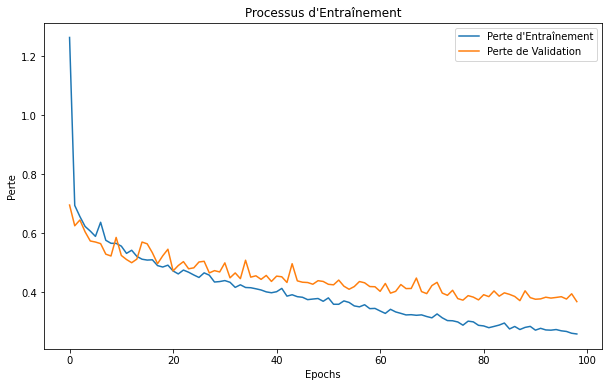

In [9]:
# Hyperparameter tuning for Neural Network (logP)
if model_exists('params/nn_best_params_logP.pkl'):
    print("Loaded existing logP params.\n")
    loaded_best_params_logP = joblib.load('params/nn_best_params_logP.pkl')
    print(f"Best trial : {loaded_best_params_logP}")
    nn_model_logP = NeuralNetworkModel(
        input_size=X_train.shape[1],
        hidden_sizes=[loaded_best_params_logP[f"hidden_size_{i}"] for i in range(loaded_best_params_logP["hidden_layers"])],
        lr=loaded_best_params_logP["lr"],
        epochs=loaded_best_params_logP["epochs"],
        batch_size=loaded_best_params_logP["batch_size"],
        patience=loaded_best_params_logP["patience"]
    )
    training_loss_logP, validation_loss_logP = nn_model_logP.train(X_train, y_train_logP, X_test, y_test_logP)
    print(f"Neural Network Model MSE for logP: {nn_model_logP.evaluate(X_test, y_test_logP)}")
    plot_training_process(training_loss_logP, validation_loss_logP, output_path="training_process_logP.png")
else:
    tuner_logP = HyperparameterTuning(X_train, y_train_logP, "Neural Network")
    best_params_logP = tuner_logP.tune(n_trials=50)
    joblib.dump(best_params_logP, 'params/nn_best_params_logP.pkl')
    nn_model_logP = NeuralNetworkModel(
        input_size=X_train.shape[1],
        hidden_sizes=[best_params_logP[f"hidden_size_{i}"] for i in range(best_params_logP["hidden_layers"])],
        lr=best_params_logP["lr"],
        epochs=best_params_logP["epochs"],
        batch_size=best_params_logP["batch_size"],
        patience=best_params_logP["patience"]
    )
    training_loss_logP, validation_loss_logP = nn_model_logP.train(X_train, y_train_logP, X_test, y_test_logP)
    torch.save(nn_model_logP.model.state_dict(), 'models/nn_model_logP.pth')
    print(f"Neural Network Model MSE for logP: {nn_model_logP.evaluate(X_test, y_test_logP)}")
    plot_training_process(training_loss_logP, validation_loss_logP, output_path="training_process_logP.png")


In [10]:
# Hyperparameter tuning and model training for KNN (pIC50)
if model_exists('params/knn_best_params_pic50.pkl'):
    print("Loaded existing pIC50 KNN params.\n")
    loaded_best_params_pic50_knn = joblib.load('params/knn_best_params_pic50.pkl')
    print(f"Best trial : {loaded_best_params_pic50_knn}")
    knn_model_pic50 = BaselineKNN(n_neighbors=loaded_best_params_pic50_knn["n_neighbors"])
    knn_model_pic50.train(X_train, y_train_pic50)
    print(f"KNN Model MSE for pIC50: {knn_model_pic50.evaluate(X_test, y_test_pic50)}")
else:
    tuner_pic50_knn = HyperparameterTuning(X_train, y_train_pic50, "KNN")
    best_params_pic50_knn = tuner_pic50_knn.tune(n_trials=50)
    joblib.dump(best_params_pic50_knn, 'params/knn_best_params_pic50.pkl')
    knn_model_pic50 = BaselineKNN(n_neighbors=best_params_pic50_knn["n_neighbors"])
    knn_model_pic50.train(X_train, y_train_pic50)
    print(f"KNN Model MSE for pIC50: {knn_model_pic50.evaluate(X_test, y_test_pic50)}")


[I 2024-06-17 21:47:51,840] A new study created in memory with name: no-name-2a890cc6-6193-4442-84f3-a4d85a3cef3f


[I 2024-06-17 21:47:52,059] Trial 0 finished with value: 2.4024092579297776 and parameters: {'n_neighbors': 2}. Best is trial 0 with value: 2.4024092579297776.
[I 2024-06-17 21:47:52,260] Trial 1 finished with value: 2.662048565232681 and parameters: {'n_neighbors': 15}. Best is trial 0 with value: 2.4024092579297776.
[I 2024-06-17 21:47:53,093] Trial 2 finished with value: 2.701408004731647 and parameters: {'n_neighbors': 17}. Best is trial 0 with value: 2.4024092579297776.
[I 2024-06-17 21:47:53,770] Trial 3 finished with value: 2.662048565232681 and parameters: {'n_neighbors': 15}. Best is trial 0 with value: 2.4024092579297776.
[I 2024-06-17 21:47:54,226] Trial 4 finished with value: 2.35771323153195 and parameters: {'n_neighbors': 4}. Best is trial 4 with value: 2.35771323153195.
[I 2024-06-17 21:47:54,503] Trial 5 finished with value: 2.765187518050057 and parameters: {'n_neighbors': 1}. Best is trial 4 with value: 2.35771323153195.
[I 2024-06-17 21:47:54,675] Trial 6 finished wi


Best trial for KNN: {'n_neighbors': 3}
KNN Model MSE for pIC50: 1.7327211768617021


In [11]:
# Hyperparameter tuning and model training for KNN (logP)
if model_exists('params/knn_best_params_logP.pkl'):
    print("Loaded existing logP KNN params.\n")
    loaded_best_params_logP_knn = joblib.load('params/knn_best_params_logP.pkl')
    print(f"Best trial : {loaded_best_params_logP_knn}")
    knn_model_logP = BaselineKNN(n_neighbors=loaded_best_params_logP_knn["n_neighbors"])
    knn_model_logP.train(X_train, y_train_logP)
    print(f"KNN Model MSE for logP: {knn_model_logP.evaluate(X_test, y_test_logP)}")
else:
    tuner_logP_knn = HyperparameterTuning(X_train, y_train_logP, "KNN")
    best_params_logP_knn = tuner_logP_knn.tune(n_trials=50)
    joblib.dump(best_params_logP_knn, 'params/knn_best_params_logP.pkl')
    knn_model_logP = BaselineKNN(n_neighbors=best_params_logP_knn["n_neighbors"])
    knn_model_logP.train(X_train, y_train_logP)
    print(f"KNN Model MSE for logP: {knn_model_logP.evaluate(X_test, y_test_logP)}")

[I 2024-06-17 21:48:09,981] A new study created in memory with name: no-name-9a069221-d142-45d9-8546-eb4be54c4d1a


[I 2024-06-17 21:48:10,188] Trial 0 finished with value: 0.9348530946189436 and parameters: {'n_neighbors': 4}. Best is trial 0 with value: 0.9348530946189436.
[I 2024-06-17 21:48:10,369] Trial 1 finished with value: 0.9548724737253368 and parameters: {'n_neighbors': 6}. Best is trial 0 with value: 0.9348530946189436.
[I 2024-06-17 21:48:10,568] Trial 2 finished with value: 0.9348530946189436 and parameters: {'n_neighbors': 4}. Best is trial 0 with value: 0.9348530946189436.
[I 2024-06-17 21:48:10,752] Trial 3 finished with value: 0.9609026966967619 and parameters: {'n_neighbors': 7}. Best is trial 0 with value: 0.9348530946189436.
[I 2024-06-17 21:48:11,027] Trial 4 finished with value: 1.1205477897546112 and parameters: {'n_neighbors': 18}. Best is trial 0 with value: 0.9348530946189436.
[I 2024-06-17 21:48:11,236] Trial 5 finished with value: 1.0558833636296059 and parameters: {'n_neighbors': 13}. Best is trial 0 with value: 0.9348530946189436.
[I 2024-06-17 21:48:11,406] Trial 6 fi


Best trial for KNN: {'n_neighbors': 4}
KNN Model MSE for logP: 0.7276687296320423


In [12]:
# Hyperparameter tuning and model training for Random Forest (pIC50)
if model_exists('params/rf_best_params_pic50.pkl'):
    print("Loaded existing pIC50 Random Forest params.\n")
    loaded_best_params_pic50_rf = joblib.load('params/rf_best_params_pic50.pkl')
    print(f"Best trial : {loaded_best_params_pic50_rf}")
    rf_model_pic50 = RandomForestModel(n_estimators=loaded_best_params_pic50_rf["n_estimators"], 
                                       max_depth=loaded_best_params_pic50_rf["max_depth"])
    rf_model_pic50.train(X_train, y_train_pic50)
    print(f"Random Forest Model MSE for pIC50: {rf_model_pic50.evaluate(X_test, y_test_pic50)}")
else:
    tuner_pic50_rf = HyperparameterTuning(X_train, y_train_pic50, "Random Forest")
    best_params_pic50_rf = tuner_pic50_rf.tune(n_trials=50)
    joblib.dump(best_params_pic50_rf, 'params/rf_best_params_pic50.pkl')
    rf_model_pic50 = RandomForestModel(n_estimators=best_params_pic50_rf["n_estimators"], 
                                       max_depth=best_params_pic50_rf["max_depth"])
    rf_model_pic50.train(X_train, y_train_pic50)
    print(f"Random Forest Model MSE for pIC50: {rf_model_pic50.evaluate(X_test, y_test_pic50)}")


[I 2024-06-17 21:49:01,891] A new study created in memory with name: no-name-bfa779e8-be96-453e-823f-dbe7779743bb


[I 2024-06-17 21:49:10,803] Trial 0 finished with value: 1.301441668079396 and parameters: {'n_estimators': 55, 'max_depth': 16}. Best is trial 0 with value: 1.301441668079396.
[I 2024-06-17 21:49:34,350] Trial 1 finished with value: 1.2755334793707027 and parameters: {'n_estimators': 139, 'max_depth': 37}. Best is trial 1 with value: 1.2755334793707027.
[I 2024-06-17 21:49:57,470] Trial 2 finished with value: 1.2761188830903167 and parameters: {'n_estimators': 107, 'max_depth': 29}. Best is trial 1 with value: 1.2755334793707027.
[I 2024-06-17 21:50:07,809] Trial 3 finished with value: 1.2856916254056072 and parameters: {'n_estimators': 62, 'max_depth': 32}. Best is trial 1 with value: 1.2755334793707027.
[I 2024-06-17 21:50:30,718] Trial 4 finished with value: 1.275150041454079 and parameters: {'n_estimators': 142, 'max_depth': 19}. Best is trial 4 with value: 1.275150041454079.
[I 2024-06-17 21:50:48,951] Trial 5 finished with value: 1.2722081216892691 and parameters: {'n_estimators

[I 2024-06-17 22:08:53,315] Trial 46 finished with value: 1.2640850705546678 and parameters: {'n_estimators': 159, 'max_depth': 27}. Best is trial 21 with value: 1.254702707129804.
[I 2024-06-17 22:09:18,783] Trial 47 finished with value: 1.2602393505118392 and parameters: {'n_estimators': 194, 'max_depth': 15}. Best is trial 21 with value: 1.254702707129804.
[I 2024-06-17 22:09:27,271] Trial 48 finished with value: 1.2958853585122376 and parameters: {'n_estimators': 63, 'max_depth': 14}. Best is trial 21 with value: 1.254702707129804.
[I 2024-06-17 22:09:53,262] Trial 49 finished with value: 1.2653700480538215 and parameters: {'n_estimators': 171, 'max_depth': 15}. Best is trial 21 with value: 1.254702707129804.



Best trial for Random Forest: {'n_estimators': 192, 'max_depth': 27}
Random Forest Model MSE for pIC50: 0.987078789876169


In [13]:
# Hyperparameter tuning and model training for Random Forest (logP)
if model_exists('params/rf_best_params_logP.pkl'):
    print("Loaded existing logP Random Forest params.\n")
    loaded_best_params_logP_rf = joblib.load('params/rf_best_params_logP.pkl')
    print(f"Best trial : {loaded_best_params_logP_rf}")
    rf_model_logP = RandomForestModel(n_estimators=loaded_best_params_logP_rf["n_estimators"], max_depth=loaded_best_params_logP_rf["max_depth"])
    rf_model_logP.train(X_train, y_train_logP)
    print(f"Random Forest Model MSE for logP: {rf_model_logP.evaluate(X_test, y_test_logP)}")
else:
    tuner_logP_rf = HyperparameterTuning(X_train, y_train_logP, "Random Forest")
    best_params_logP_rf = tuner_logP_rf.tune(n_trials=50)
    joblib.dump(best_params_logP_rf, 'params/rf_best_params_logP.pkl')
    rf_model_logP = RandomForestModel(n_estimators=best_params_logP_rf["n_estimators"], max_depth=best_params_logP_rf["max_depth"])
    rf_model_logP.train(X_train, y_train_logP)
    print(f"Random Forest Model MSE for logP: {rf_model_logP.evaluate(X_test, y_test_logP)}")


[I 2024-06-17 22:10:29,333] A new study created in memory with name: no-name-c0cfd244-c32a-43a0-aaeb-08009b866c55


[I 2024-06-17 22:10:56,939] Trial 0 finished with value: 0.5778682513879766 and parameters: {'n_estimators': 173, 'max_depth': 15}. Best is trial 0 with value: 0.5778682513879766.
[I 2024-06-17 22:11:13,691] Trial 1 finished with value: 0.5938429058393251 and parameters: {'n_estimators': 126, 'max_depth': 13}. Best is trial 0 with value: 0.5778682513879766.
[I 2024-06-17 22:11:33,761] Trial 2 finished with value: 0.5670435294423138 and parameters: {'n_estimators': 98, 'max_depth': 26}. Best is trial 2 with value: 0.5670435294423138.
[I 2024-06-17 22:12:01,643] Trial 3 finished with value: 0.5632269926190686 and parameters: {'n_estimators': 127, 'max_depth': 24}. Best is trial 3 with value: 0.5632269926190686.
[I 2024-06-17 22:12:11,722] Trial 4 finished with value: 0.5737311552876566 and parameters: {'n_estimators': 51, 'max_depth': 18}. Best is trial 3 with value: 0.5632269926190686.
[I 2024-06-17 22:12:23,347] Trial 5 finished with value: 0.5744779437744026 and parameters: {'n_estima

[I 2024-06-17 22:33:20,534] Trial 46 finished with value: 0.567107789473542 and parameters: {'n_estimators': 100, 'max_depth': 39}. Best is trial 3 with value: 0.5632269926190686.
[I 2024-06-17 22:33:51,742] Trial 47 finished with value: 0.5639712516016121 and parameters: {'n_estimators': 142, 'max_depth': 36}. Best is trial 3 with value: 0.5632269926190686.
[I 2024-06-17 22:34:19,315] Trial 48 finished with value: 0.566364734979982 and parameters: {'n_estimators': 133, 'max_depth': 26}. Best is trial 3 with value: 0.5632269926190686.
[I 2024-06-17 22:34:47,214] Trial 49 finished with value: 0.5649237225508106 and parameters: {'n_estimators': 142, 'max_depth': 30}. Best is trial 3 with value: 0.5632269926190686.



Best trial for Random Forest: {'n_estimators': 127, 'max_depth': 24}
Random Forest Model MSE for logP: 0.4439632703998141


In [15]:
# Hyperparameter tuning and model training for Gradient Boosting (pIC50)
if model_exists('params/gb_best_params_pic50.pkl'):
    print("Loaded existing pIC50 Gradient Boosting params.\n")
    loaded_best_params_pic50_gb = joblib.load('params/gb_best_params_pic50.pkl')
    print(f"Best trial : {loaded_best_params_pic50_gb}")
    gb_model_pic50 = GradientBoostingModel(n_estimators=loaded_best_params_pic50_gb["n_estimators"], 
                                           learning_rate=loaded_best_params_pic50_gb["learning_rate"], 
                                           max_depth=loaded_best_params_pic50_gb["max_depth"])
    gb_model_pic50.train(X_train, y_train_pic50)
    print(f"Gradient Boosting Model MSE for pIC50: {gb_model_pic50.evaluate(X_test, y_test_pic50)}")
else:
    tuner_pic50_gb = HyperparameterTuning(X_train, y_train_pic50, "Gradient Boosting")
    best_params_pic50_gb = tuner_pic50_gb.tune(n_trials=50)
    joblib.dump(best_params_pic50_gb, 'params/gb_best_params_pic50.pkl')
    gb_model_pic50 = GradientBoostingModel(n_estimators=best_params_pic50_gb["n_estimators"], 
                                           learning_rate=best_params_pic50_gb["learning_rate"], 
                                           max_depth=best_params_pic50_gb["max_depth"])
    gb_model_pic50.train(X_train, y_train_pic50)
    print(f"Gradient Boosting Model MSE for pIC50: {gb_model_pic50.evaluate(X_test, y_test_pic50)}")


[I 2024-06-17 22:47:15,106] A new study created in memory with name: no-name-0b006940-cfe4-4647-af49-9c659ab74ccc


[I 2024-06-17 22:47:34,653] Trial 0 finished with value: 5.841573490387944 and parameters: {'n_estimators': 78, 'learning_rate': 0.00047744094604837016, 'max_depth': 40}. Best is trial 0 with value: 5.841573490387944.
[I 2024-06-17 22:48:16,112] Trial 1 finished with value: 2.049610944490119 and parameters: {'n_estimators': 154, 'learning_rate': 0.018110948577404133, 'max_depth': 22}. Best is trial 1 with value: 2.049610944490119.
[I 2024-06-17 22:48:42,971] Trial 2 finished with value: 5.719312596328954 and parameters: {'n_estimators': 114, 'learning_rate': 0.0004404062885311893, 'max_depth': 19}. Best is trial 1 with value: 2.049610944490119.
[I 2024-06-17 22:49:01,794] Trial 3 finished with value: 1.951475877710271 and parameters: {'n_estimators': 81, 'learning_rate': 0.026014525981125122, 'max_depth': 18}. Best is trial 3 with value: 1.951475877710271.
[I 2024-06-17 22:49:36,885] Trial 4 finished with value: 2.170076507820958 and parameters: {'n_estimators': 139, 'learning_rate': 0

[I 2024-06-17 23:05:54,042] Trial 38 finished with value: 2.152427691955969 and parameters: {'n_estimators': 147, 'learning_rate': 0.007018620104443936, 'max_depth': 40}. Best is trial 29 with value: 1.5377408553982317.
[I 2024-06-17 23:06:14,956] Trial 39 finished with value: 1.5427605866137855 and parameters: {'n_estimators': 174, 'learning_rate': 0.0240769956328051, 'max_depth': 10}. Best is trial 29 with value: 1.5377408553982317.
[I 2024-06-17 23:06:44,815] Trial 40 finished with value: 3.0102084577006374 and parameters: {'n_estimators': 162, 'learning_rate': 0.003254049977342847, 'max_depth': 14}. Best is trial 29 with value: 1.5377408553982317.
[I 2024-06-17 23:07:06,498] Trial 41 finished with value: 1.5280247161093465 and parameters: {'n_estimators': 173, 'learning_rate': 0.020746793365614725, 'max_depth': 10}. Best is trial 41 with value: 1.5280247161093465.
[I 2024-06-17 23:07:28,549] Trial 42 finished with value: 1.8586586862935022 and parameters: {'n_estimators': 152, 'lea


Best trial for Gradient Boosting: {'n_estimators': 173, 'learning_rate': 0.020746793365614725, 'max_depth': 10}
Gradient Boosting Model MSE for pIC50: 1.0729740519461792


In [16]:
# Hyperparameter tuning and model training for Gradient Boosting (logP)
if model_exists('params/gb_best_params_logP.pkl'):
    print("Loaded existing logP Gradient Boosting params.\n")
    loaded_best_params_logP_gb = joblib.load('params/gb_best_params_logP.pkl')
    print(f"Best trial : {loaded_best_params_logP_gb}")
    gb_model_logP = GradientBoostingModel(n_estimators=loaded_best_params_logP_gb["n_estimators"], 
                                          learning_rate=loaded_best_params_logP_gb["learning_rate"], 
                                          max_depth=loaded_best_params_logP_gb["max_depth"])
    gb_model_logP.train(X_train, y_train_logP)
    print(f"Gradient Boosting Model MSE for logP: {gb_model_logP.evaluate(X_test, y_test_logP)}")
else:
    tuner_logP_gb = HyperparameterTuning(X_train, y_train_logP, "Gradient Boosting")
    best_params_logP_gb = tuner_logP_gb.tune(n_trials=50)
    joblib.dump(best_params_logP_gb, 'params/gb_best_params_logP.pkl')
    gb_model_logP = GradientBoostingModel(n_estimators=best_params_logP_gb["n_estimators"], 
                                          learning_rate=best_params_logP_gb["learning_rate"], 
                                          max_depth=best_params_logP_gb["max_depth"])
    gb_model_logP.train(X_train, y_train_logP)
    print(f"Gradient Boosting Model MSE for logP: {gb_model_logP.evaluate(X_test, y_test_logP)}")


[I 2024-06-17 23:23:38,413] A new study created in memory with name: no-name-0b186057-a6d9-49ee-ba3e-d1fe1b1a4122


[I 2024-06-17 23:24:18,179] Trial 0 finished with value: 1.3748033995637243 and parameters: {'n_estimators': 131, 'learning_rate': 0.002448477867553428, 'max_depth': 37}. Best is trial 0 with value: 1.3748033995637243.
[I 2024-06-17 23:25:04,377] Trial 1 finished with value: 2.0898803517857867 and parameters: {'n_estimators': 151, 'learning_rate': 1.0794507118448707e-05, 'max_depth': 29}. Best is trial 0 with value: 1.3748033995637243.
[I 2024-06-17 23:25:53,375] Trial 2 finished with value: 2.063743894073264 and parameters: {'n_estimators': 148, 'learning_rate': 6.743990264864569e-05, 'max_depth': 28}. Best is trial 0 with value: 1.3748033995637243.
[I 2024-06-17 23:26:26,157] Trial 3 finished with value: 0.8823010032263832 and parameters: {'n_estimators': 115, 'learning_rate': 0.024803475422241004, 'max_depth': 34}. Best is trial 3 with value: 0.8823010032263832.
[I 2024-06-17 23:27:00,363] Trial 4 finished with value: 2.0635388758052984 and parameters: {'n_estimators': 118, 'learnin

[I 2024-06-17 23:45:48,291] Trial 38 finished with value: 0.7381468685821965 and parameters: {'n_estimators': 143, 'learning_rate': 0.053447380547905536, 'max_depth': 17}. Best is trial 32 with value: 0.5641018613891358.
[I 2024-06-17 23:46:38,584] Trial 39 finished with value: 2.029751708283739 and parameters: {'n_estimators': 171, 'learning_rate': 0.00012330974908615836, 'max_depth': 30}. Best is trial 32 with value: 0.5641018613891358.
[I 2024-06-17 23:47:38,187] Trial 40 finished with value: 0.9653041098060319 and parameters: {'n_estimators': 193, 'learning_rate': 0.0040119882944397245, 'max_depth': 27}. Best is trial 32 with value: 0.5641018613891358.
[I 2024-06-17 23:48:03,647] Trial 41 finished with value: 0.6030236924126838 and parameters: {'n_estimators': 149, 'learning_rate': 0.06412120366663174, 'max_depth': 12}. Best is trial 32 with value: 0.5641018613891358.
[I 2024-06-17 23:48:29,749] Trial 42 finished with value: 0.6539026274563065 and parameters: {'n_estimators': 128, 


Best trial for Gradient Boosting: {'n_estimators': 155, 'learning_rate': 0.057744771357231404, 'max_depth': 10}
Gradient Boosting Model MSE for logP: 0.43165179660287806


In [17]:
# Results visualization for pIC50
results_pic50 = {
    "Neural Network": nn_model_pic50.evaluate(X_test, y_test_pic50),
    "KNN": knn_model_pic50.evaluate(X_test, y_test_pic50),
    "Random Forest": rf_model_pic50.evaluate(X_test, y_test_pic50),
    "Gradient Boosting": gb_model_pic50.evaluate(X_test, y_test_pic50)
}

In [18]:
# Results visualization for logP
results_logP = {
    "Neural Network": nn_model_logP.evaluate(X_test, y_test_logP),
    "KNN": knn_model_logP.evaluate(X_test, y_test_logP),
    "Random Forest": rf_model_logP.evaluate(X_test, y_test_logP),
    "Gradient Boosting": gb_model_logP.evaluate(X_test, y_test_logP)
}

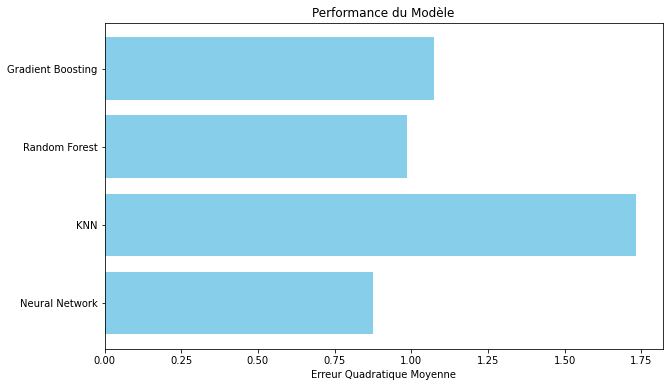

In [19]:
# Results visualization for pIC50
plot_results(results_pic50)

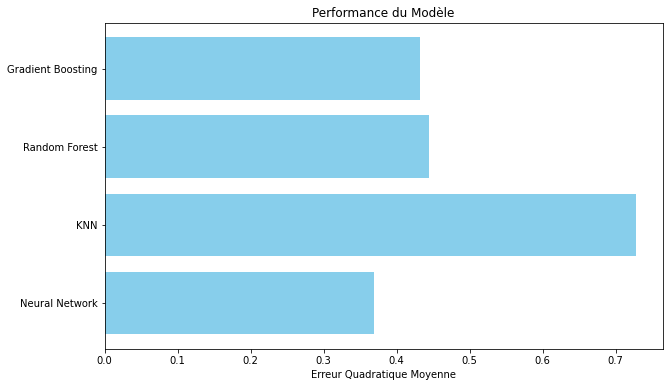

In [20]:
# Results visualization for logP
plot_results(results_logP)

In [33]:
# Visualize training processes for all models (pIC50)
# plot_multiple_training_processes(training_losses_pic50, validation_losses_pic50)


In [34]:
# Visualize training processes for all models (logP)
# plot_multiple_training_processes(training_losses_logP, validation_losses_logP)
